<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r2-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-1-r2.csv?token=AKVFSOFSLBI4J7JFHUBWGV263IB6I')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-11-r2.csv?token=AKVFSOFQUUBBYNVV7YQ5NPS63IB6M')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-4-m-1-r2.csv?token=AKVFSOHJLEXVJZ6DEHEY3MC63IB6S')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-4-m-11-r2.csv?token=AKVFSOF62L77TIJWO3FHGRK63IB6W')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-6-m-1-r2.csv?token=AKVFSOF2J74QDFDSTJXND6C63IB62')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-6-m-11-r2.csv?token=AKVFSOFRYANB753XXYWZJ5S63IB7A')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-9-m-1-r2.csv?token=AKVFSOCKK5SWH6HPZOMC4MK63IB7E')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-9-m-11-r2.csv?token=AKVFSOBR3X7HLFJOB5OCCYK63IB7K')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-normal-n-0-15-r2.csv?token=AKVFSOHGATDNW3YY2EEOYK263ICNO')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-normal-n-0-4-r2.csv?token=AKVFSOHWZLPSPTH3LXEJ3DS63ICNS')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-normal-n-0-6-r2.csv?token=AKVFSOGA5SJ22KMARI34HOK63ICOY')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-normal-n-0-9-r2.csv?token=AKVFSOHLGHAIDEGAXZZGO3S63ICO6')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(53621, 26)
(39851, 26)
(53353, 26)
(39884, 26)
(54112, 26)
(40655, 26)
(53593, 26)
(39877, 26)
(31029, 26)
(30992, 26)
(31800, 26)
(30988, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r2-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r2-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,12,1,12,12,8,8,3,27,0
1,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,12,1,12,12,8,8,3,27,0
2,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,12,1,12,12,8,8,3,27,0
3,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,12,1,12,12,8,8,3,27,0
4,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,11,2,12,22,8,4,3,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499750,3276535,4,0,6,4,2,3,10,18,2,20,4,30091,3,0,0.000000,25,5,11,15,55,0,1444368,18,180,0
499751,3276542,4,0,6,5,3,3,10,18,2,20,4,30091,3,0,0.000000,32,4,12,15,48,0,2708190,18,180,0
499752,3276543,4,0,2,1,4,3,11,18,2,20,4,30092,3,0,0.000000,32,3,13,15,39,0,240736,6,66,0
499753,3276544,2,0,7,1,4,3,12,18,2,15,15,30091,4,0,0.000000,6,2,14,15,28,0,842548,21,252,0


In [7]:
df.shape

(499755, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-12-r2.csv?token=AKVFSOHNXJCRW2Y5EHJ525263ICWK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-15-m-7-r2.csv?token=AKVFSOFOWY6S2IPVTC5I3OK63ICWM')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-4-m-12-r2.csv?token=AKVFSOC7U4MMJECV3FGI4LS63ICWS')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-4-m-7-r2.csv?token=AKVFSOAWE5QTONHX4RD4EY263ICWW')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-6-m-12-r2.csv?token=AKVFSODHOHWOSWVRNLR777K63ICW2')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-6-m-7-r2.csv?token=AKVFSOCC7FEFNYFPP6RH4WS63ICXE')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-9-m-12-r2.csv?token=AKVFSOALPDWQGI6POBXUPWS63ICXI')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r2/2-fft-malicious-n-0-9-m-7-r2.csv?token=AKVFSOHCDEYQEGI5AZJCU7K63ICXO')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(39884, 26)
(39851, 26)
(39303, 26)
(39884, 26)
(40074, 26)
(40633, 26)
(39303, 26)
(39884, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,2,3,1,0.333333,8,12,1,12,12,8,8,3,27,0
1,15,2,4,1,1,4,3,10,0,0,23,7,1,4,2,0.500000,12,11,2,12,22,8,4,3,30,0
2,218,1,4,1,1,4,3,9,1,1,22,6,8,2,1,0.500000,8,10,3,12,30,4,32,3,27,0
3,240,1,4,1,1,4,3,9,0,0,22,6,9,3,2,0.666667,12,9,4,12,36,4,36,3,27,0
4,328,2,4,1,1,4,3,9,1,1,23,7,11,3,1,0.333333,8,8,5,12,40,8,44,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54107,3266088,1,4,5,2,2,3,9,0,0,22,6,30087,3,2,0.666667,19,5,3,7,15,4,601740,15,135,0
54108,3266095,1,4,5,3,2,3,9,0,0,22,6,30087,3,2,0.666667,26,4,4,7,16,4,902610,15,135,0
54109,3266102,1,4,5,4,2,3,9,0,0,22,6,30087,3,2,0.666667,33,3,5,7,15,4,1203480,15,135,0
54110,3266109,1,4,5,5,3,3,9,0,0,22,6,30087,3,2,0.666667,40,2,6,7,12,4,2256525,15,135,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.512345,0.321716,0.002674,-0.003928,NaN,0.358342,-0.043400,0.189797,-0.741610,-0.845602,-0.218185,-0.085671,0.105859,0.015177,0.023640,0.302289,0.058313,0.321716,0.396330,0.000574
inport,-0.512345,1.000000,-0.229030,0.066325,-0.097494,NaN,-0.464970,0.055159,0.255582,0.489028,0.391905,0.222885,-0.072107,-0.159066,-0.173793,-0.161628,0.531595,-0.012764,-0.229030,-0.345620,-0.001587
cache_coherence_type,0.321716,-0.229030,1.000000,0.358016,-0.526208,NaN,-0.112834,-0.002491,-0.031520,-0.301502,-0.283410,-0.520338,0.026021,-0.007125,0.014205,0.017847,0.016835,0.298318,1.000000,0.963710,-0.000497
flit_id,0.002674,0.066325,0.358016,1.000000,-0.088306,NaN,-0.235956,0.017917,0.046477,0.005149,-0.003354,0.533402,-0.006910,0.005325,-0.001192,0.002569,0.038602,0.667498,0.358016,0.292654,0.000177
flit_type,-0.003928,-0.097494,-0.526208,-0.088306,1.000000,NaN,0.346810,-0.026343,-0.068327,-0.007575,0.004931,0.481207,-0.098280,0.101499,0.002420,0.004751,-0.056747,0.056638,-0.526208,-0.430137,-0.000281
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.358342,-0.464970,-0.112834,-0.235956,0.346810,NaN,1.000000,-0.006576,-0.181618,-0.465512,-0.391677,-0.048398,0.014174,0.133901,0.111321,0.099757,-0.302288,-0.090758,-0.112834,0.148877,-0.008380
traversal_id,-0.043400,0.055159,-0.002491,0.017917,-0.026343,NaN,-0.006576,1.000000,0.030882,0.008236,-0.007589,0.025340,0.039649,0.040408,0.060186,0.005847,0.007667,0.547177,-0.002491,-0.005350,-0.245792
hop_count,0.189797,0.255582,-0.031520,0.046477,-0.068327,NaN,-0.181618,0.030882,1.000000,0.220360,-0.341015,0.121495,-0.194080,-0.096024,-0.218096,-0.186354,0.552140,0.024173,-0.031520,-0.084853,0.066816
current_hop,-0.741610,0.489028,-0.301502,0.005149,-0.007575,NaN,-0.465512,0.008236,0.220360,1.000000,0.802050,0.307414,-0.000076,-0.126178,-0.094916,-0.091235,0.099089,-0.067138,-0.301502,-0.407443,0.081322


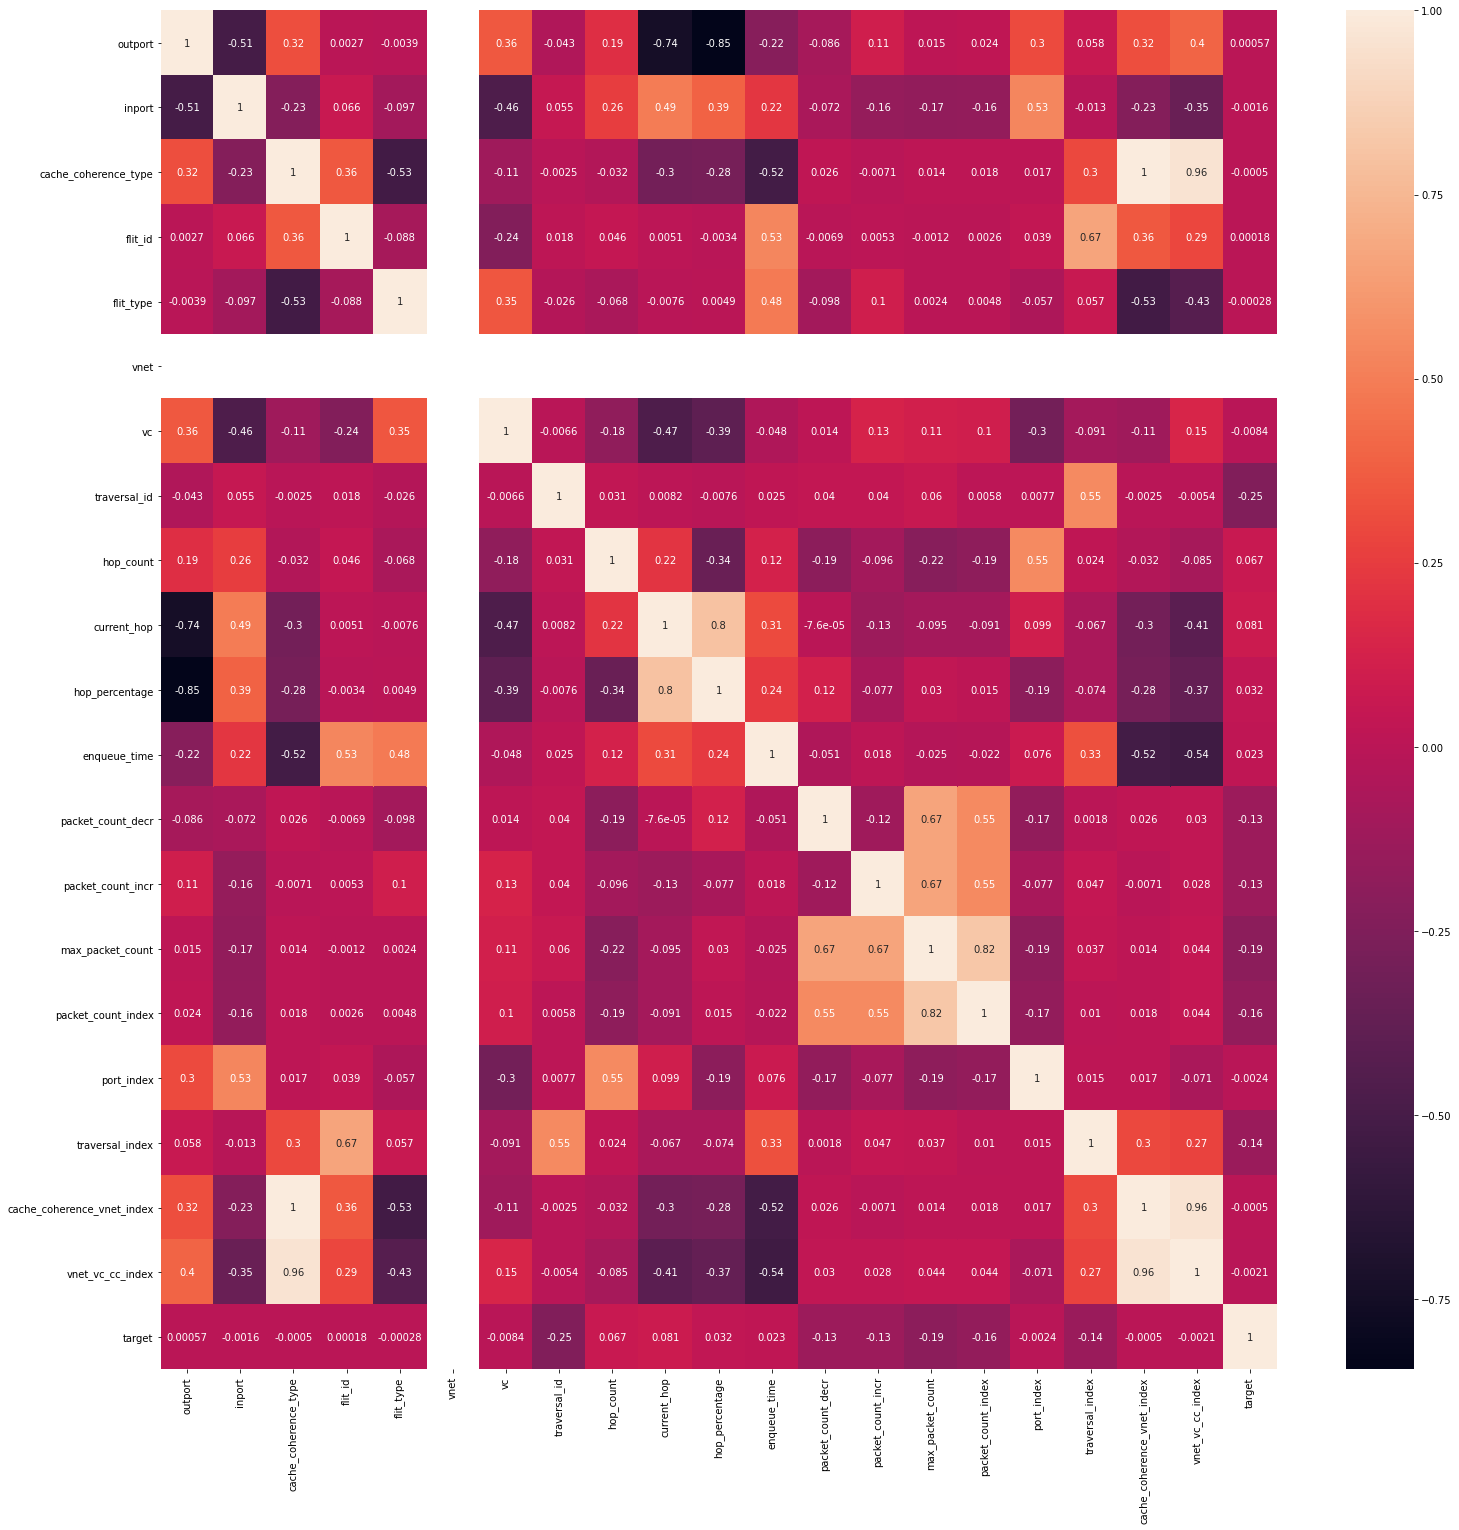

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

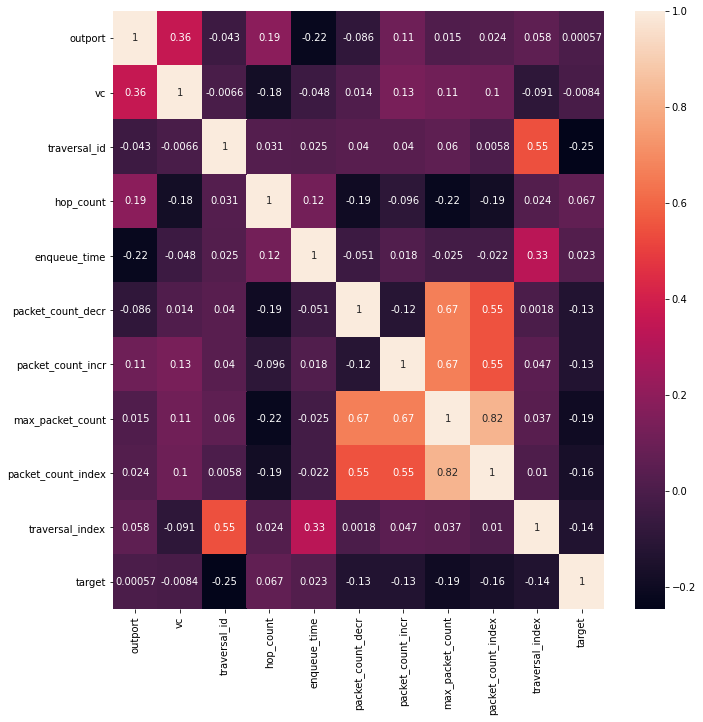

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

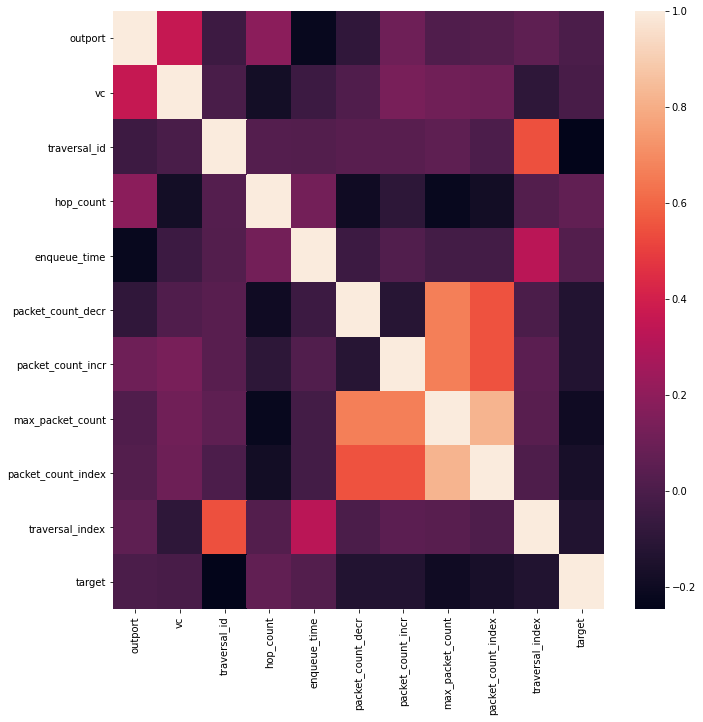

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000000,0.000033,0.4,0.066667,0.079710,0.000000,0.079710,0.002245,0.000001
1,0.5,0.000000,0.000033,0.4,0.066667,0.079710,0.000000,0.079710,0.002245,0.000001
2,0.5,0.000000,0.000033,0.4,0.066667,0.079710,0.000000,0.079710,0.002245,0.000001
3,0.5,0.000000,0.000033,0.4,0.066667,0.079710,0.000000,0.079710,0.002245,0.000001
4,0.5,0.333333,0.000000,0.6,0.133333,0.072464,0.007246,0.079710,0.004287,0.000000
...,...,...,...,...,...,...,...,...,...,...
499750,1.0,0.333333,0.999900,0.4,0.350000,0.028986,0.072464,0.101449,0.011023,0.533333
499751,1.0,0.333333,0.999900,0.4,0.466667,0.021739,0.079710,0.101449,0.009594,1.000000
499752,1.0,0.666667,0.999934,0.4,0.466667,0.014493,0.086957,0.101449,0.007757,0.088890
499753,0.5,1.000000,0.999900,0.6,0.033333,0.007246,0.094203,0.101449,0.005511,0.311110


In [22]:
train_X[train_X.duplicated()].shape

(6987, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.50,0.133333,0.039683,0.000000,0.039683,0.001221,0.000000
1,0.25,0.000000,0.000233,0.25,0.133333,0.031746,0.007937,0.039683,0.002198,0.000010
2,0.50,0.000000,0.000333,0.50,0.133333,0.023810,0.015873,0.039683,0.002686,0.000015
3,0.50,0.000000,0.000632,0.50,0.133333,0.015873,0.023810,0.039683,0.002686,0.000028
4,0.25,0.000000,0.000831,0.75,0.133333,0.007937,0.031746,0.039683,0.002198,0.000037
...,...,...,...,...,...,...,...,...,...,...
39879,1.00,0.333333,0.999967,0.25,0.350000,0.031746,0.079365,0.111111,0.013187,0.533333
39880,1.00,0.333333,0.999967,0.25,0.466667,0.023810,0.087302,0.111111,0.011477,1.000000
39881,1.00,0.666667,1.000000,0.25,0.466667,0.015873,0.095238,0.111111,0.009280,0.088890
39882,0.50,1.000000,0.999967,0.50,0.033333,0.007937,0.103175,0.111111,0.006593,0.311110


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    374946
1    124809
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  4302.990399
9     traversal_index  1468.409959
7    max_packet_count  1466.932642
8  packet_count_index  1162.929515
5   packet_count_decr   736.695472
6   packet_count_incr   730.241494
3           hop_count   170.480747
4        enqueue_time    24.169740
1                  vc    12.895553
0             outport     0.139982


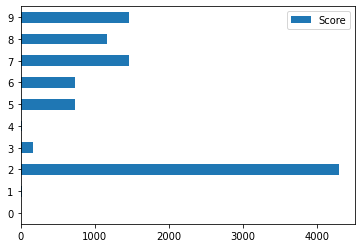

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r2.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.63134936118698
Test Prediction Score 95.34471891226701


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.78166683381806
Test Prediction Score 87.84221224059621
Test Prediction Score 86.74655878686104
Test Prediction Score 87.95506970213619
Test Prediction Score 86.56735040175676
Test Prediction Score 87.64550980729948
Test Prediction Score 85.7669897972165
Test Prediction Score 87.15775749674054


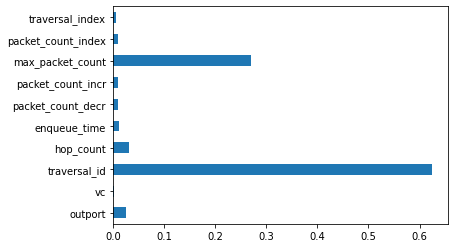

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

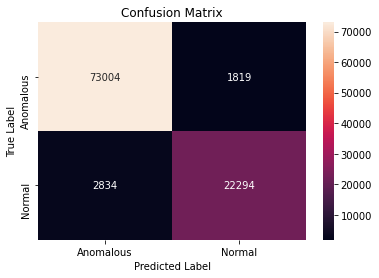

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     74823
           1       0.92      0.89      0.91     25128

    accuracy                           0.95     99951
   macro avg       0.94      0.93      0.94     99951
weighted avg       0.95      0.95      0.95     99951



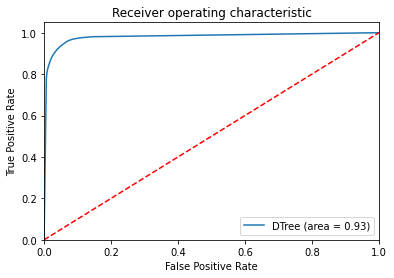

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r2l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.94472291422797
Test Prediction Score 99.07454652779862


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.02065991374988
Test Prediction Score 89.40302627286643
Test Prediction Score 90.60885937460245
Test Prediction Score 91.28472570454318
Test Prediction Score 88.0870389778909
Test Prediction Score 89.25750006152634
Test Prediction Score 89.24509579421418
Test Prediction Score 90.22665730618795


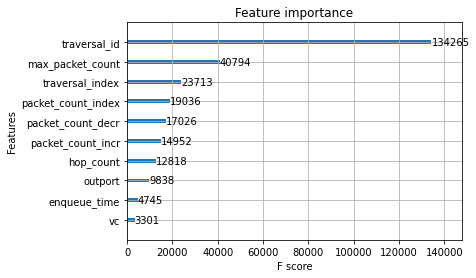

In [52]:
plot_importance(xgbc)
plt.show()

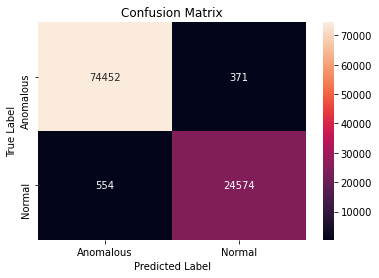

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74823
           1       0.99      0.98      0.98     25128

    accuracy                           0.99     99951
   macro avg       0.99      0.99      0.99     99951
weighted avg       0.99      0.99      0.99     99951



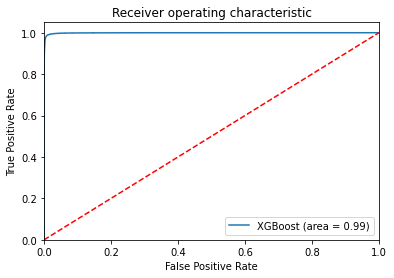

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()